# ROC-AUC Evaluation for Employee Retention

This notebook loads the HR dataset, trains a Naive Bayes classifier to predict employee attrition, and evaluates the model using ROC-AUC.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def evaluate_classifier(y_test, y_pred):
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))
    print("===================")
    print(f"accuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(f"recall: {recall_score(y_test, y_pred):.3f}")
    print(f"f1-score: {f1_score(y_test, y_pred):.3f}")
    print(f"precision: {precision_score(y_test, y_pred):.3f}")

def auc_roc(classifier, X_test, y_test):
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"ROC-AUC Score: {auc:.4f}")
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='Orange', label="Naive Bayes")
    plt.plot([0, 1], [0, 1], color='lightblue', linestyle='--', label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


## 1. Load Data

In [9]:
file_path = 'https://raw.githubusercontent.com/LuckyBoy587/Advanced-ML-Techniques/master/Day1/P9/ML470_S1_HR_Data_Practice.xlsx'
df = pd.read_excel(file_path)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Preprocessing

Encode categorical variables ('Department', 'salary') and split the data into features (X) and target (y).

In [10]:
# Encode categorical columns
le = LabelEncoder()
df['Department'] = le.fit_transform(df['Department'])
df['salary'] = le.fit_transform(df['salary'])

# Split features and target
X = df.drop('left', axis=1)
y = df['left']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 3. Train Naive Bayes Classifier

In [11]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

## 4. Evaluate Classifier

Using the custom `evaluate_classifier` function to check confusion matrix, accuracy, recall, f1-score, and precision.

In [12]:
evaluate_classifier(y_test, y_pred)

Confusion Matrix
[[2831  597]
 [ 307  765]]
accuracy: 0.799
recall: 0.714
f1-score: 0.629
precision: 0.562


## 5. ROC-AUC Visualization

Calculate and plot the ROC curve.

ROC-AUC Score: 0.8447


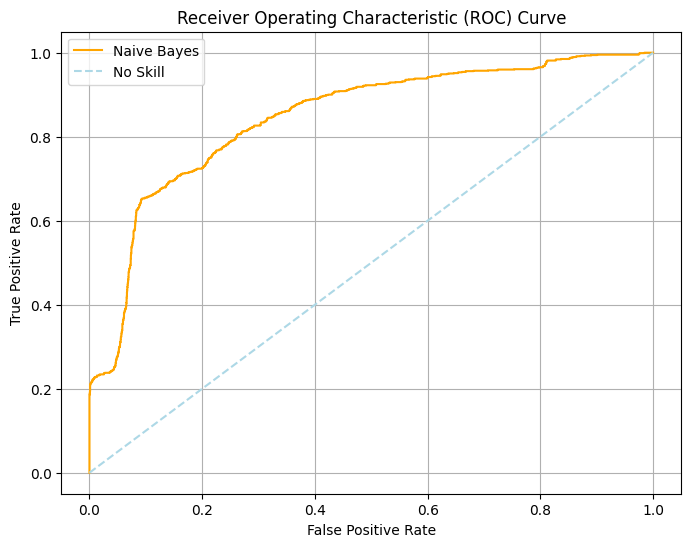

In [15]:
auc_roc(classifier, X_test, y_test)